# Analyzing Changes in Crime during the COVID-19 Pandemic in Chicago

## Introduction

The pandemic induced by the COVID-19 virus forced governments worldwide to impose restrictions on travel and movement in order to limit its spread. The policies included closure of businesses and non-essential services, suspension of in-person learning, gathering size restrictions, use of public transit and few others. On an individual level, people started taking precautions in the form of social distancing measures, face-coverings, and additional health measures. The level of conatct and interaction reduced drastically, which had an imapct on most acitivity and social patterns. 

Crime too was affected by this. The level of crimanal activity and the oppurtunity to commit these crimes were affected through various channels - COVID-19 limited movement around the city due to the restrictions imposed, which reduced the oppurtunity for a crime to occur; The pandemic had an economic impact in terms of increasing unemployment and disruption of business (affecting income levels and increasing inequalities), impacting the incentive to indulge in crime-realted activities. The lockdown restrictions also have an impact on domestic crimes, as the victims would have to stay at home with their abusers, and would find it more difficult to report the crime. These restrictions affected the police authorities and their response as well. 

The aim of this paper is to understand the impact of restrictions on the level of crime in the city of Chicago. We will use data of reports of incidents of crime from 2018 to 2021 sourced from the City of Chicago database (link - https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/data) to analyze the changes in crime in Chicago, some of the factors that are behind this change and whether there are factors beside restrictions that has led to a fall in the number of crime-realted reports in Chicago.

To understand the impact of COVID-19 on crime, we intend to analyze the realtions of time of the day (which will be divided into 4 parts, Morning, Afternoon, Evening and Night); different quarters of the year; district codes; description of the location and type of crime, with the number of incidents reported. The location variable will be further analyzed through addition data on employment and income levels of each zip code which will be added to our analysis through HTML web-scrapping.

## Project 1

In the first project, we first load and clean the data as per requirements. Then, Apple Mobility Data for Walking, Driving and Transit is added. We then look at summary statistics and visulation for our variables of analysis. 

### The Data

The data includes:
- Date of the incident report.
- Time at which the crime was reported.
- Location (the data has Block details, Community Area code, FBI code, a description of the location, and the exact geographical   location of the crime). 
- Description of the crime (a primary type, and a short desciption of the crime)
- If an arrest was made 
- If it was domestic (implying that whether the person in question was a family member). 

In [9]:
# importing all the required libraries
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
#import geopandas as gpd
import requests

#from pandas_datareader import DataReader
#from shapely.geometry import Point

#%matplotlib inline
# activate plot theme
#import qeds
#qeds.themes.mpl_style();

In [10]:
# reading the csv file
crime = pd.read_csv("chicago_crime.csv")
crime_df = pd.DataFrame(crime)

FileNotFoundError: [Errno 2] No such file or directory: 'chicago_crime.csv'

### Cleaning the Data

The data is cleaned as per requirements.

**1. Removing NA values**

Dropping N/A or blank values from the data.

In [3]:
crime_df = crime_df.dropna()

**2. Removing 2016,17,22 observations**

We are looking at incidents of crime from 2018-2021.

In [4]:
crime_df.set_index("Year", inplace=True)

#Removing all 2022 observations
crime_df = crime_df.drop([2016, 2017, 2022])
crime_df.reset_index(inplace=True)

**3. Splitting Data**

Splitting data into new columns to help with our analysis.

In [5]:
crime_df[["Date_clean", "Time"]] = crime_df["Date"].str.split(" ", n=1, expand=True)

In [6]:
crime_df[["Month", "Day", "Yr"]] = crime_df["Date_clean"].str.split("/", n=2, expand=True)

In [7]:
crime_df[["Hour", "Min", "Sec"]] = crime_df["Time"].str.split(":", n=2, expand=True)

In [8]:
crime_df[["sec_1", "AM_PM"]] = crime_df["Sec"].str.split(" ", n=1, expand=True)

In [9]:
crime_df["Hour_AM_PM"] = crime_df["Hour"] + crime_df["AM_PM"]

In [10]:
crime_df["Location"] = list(zip(crime_df.Longitude, crime_df.Latitude))

In [11]:
crime_df["Location"] = crime_df["Location"].apply(Point)

**4. Changing types**

In [12]:
# converting columns in types required
crime_df['District'] = crime_df['District'].astype(int)
crime_df['Month'] = crime_df['Month'].astype(int)
crime_df['Day'] = crime_df['Day'].astype(int)
crime_df['Hour'] = crime_df['Hour'].astype(int)

**5. Adding Columns**

Here, we will add new columns for :-
- Time: We will divide the day into 4 parts, 
       Morning(6AM - 12PM); Afternoon(12PM - 6PM); Evening(6PM - 12AM); Night(12AM - 6AM)
- Month: We will divide the year into 4 quarters.


In [13]:
# Quarter column
conditions = [(crime_df['Month'] <= 3), 
              (crime_df['Month'] <= 6), 
              (crime_df['Month'] <= 9),
              (crime_df['Month'] > 9)]

values = [1, 2, 3, 4]

crime_df['Quarter'] = np.select(conditions, values)

In [14]:
# Time column
conditions = [(crime_df['Hour_AM_PM'] == '12AM'), 
              (crime_df['Hour_AM_PM'] == '01AM'),
              (crime_df['Hour_AM_PM'] == '02AM'),
              (crime_df['Hour_AM_PM'] == '03AM'),
              (crime_df['Hour_AM_PM'] == '04AM'),
              (crime_df['Hour_AM_PM'] == '05AM'),
              (crime_df['Hour_AM_PM'] == '06AM'),
              (crime_df['Hour_AM_PM'] == '07AM'),
              (crime_df['Hour_AM_PM'] == '08AM'),
              (crime_df['Hour_AM_PM'] == '09AM'),
              (crime_df['Hour_AM_PM'] == '10AM'),
              (crime_df['Hour_AM_PM'] == '11AM'),
              (crime_df['Hour_AM_PM'] == '12PM'), 
              (crime_df['Hour_AM_PM'] == '01PM'),
              (crime_df['Hour_AM_PM'] == '02PM'),
              (crime_df['Hour_AM_PM'] == '03PM'),
              (crime_df['Hour_AM_PM'] == '04PM'),
              (crime_df['Hour_AM_PM'] == '05PM'),
              (crime_df['Hour_AM_PM'] == '06PM'),
              (crime_df['Hour_AM_PM'] == '07PM'),
              (crime_df['Hour_AM_PM'] == '08PM'),
              (crime_df['Hour_AM_PM'] == '09PM'),
              (crime_df['Hour_AM_PM'] == '10PM'),
              (crime_df['Hour_AM_PM'] == '11PM')]
               
values = ['Night', 'Night', 'Night', 'Night', 'Night', 'Night',
          'Morning', 'Morning', 'Morning', 'Morning', 'Morning', 'Morning',
          'Afternoon', 'Afternoon', 'Afternoon', 'Afternoon', 'Afternoon', 'Afternoon',
          'Evening', 'Evening', 'Evening', 'Evening', 'Evening', 'Evening']

crime_df['Time_of_Day'] = np.select(conditions, values)


**6. Removing columns**

This is done in order to make the data more readable, by eliminating unnecessary chunks of data not required for our analysis.

In [15]:
crime_df = crime_df.drop(["ID", "Case Number", "Date", "Block", "IUCR", "Beat", "Ward", "FBI Code", 
                          "Date_clean", "Yr", "Updated On", 'Time', 'Yr', 'Min', 'Sec', 'sec_1', 'AM_PM',
                          "Description", "Hour_AM_PM"]
                         , axis=1)

**THE DATA**

In [16]:
crime_df.head()

,Year,Primary Type,Location Description,Arrest,Domestic,District,Community Area,X Coordinate,Y Coordinate,Latitude,Longitude,Location,Month,Day,Hour,Quarter,Time_of_Day
0,2018,DECEPTIVE PRACTICE,RESIDENCE,False,False,8,70.0,1154348.0,1854412.0,41.756325,-87.709916,POINT (-87.709916401 41.756324845),1,1,12,1,Night
1,2018,THEFT,PARKING LOT/GARAGE(NON.RESID.),False,False,1,32.0,1178293.0,1900315.0,41.881777,-87.620768,POINT (-87.620767948 41.881776822),1,1,12,1,Night
2,2018,THEFT,NURSING HOME/RETIREMENT HOME,False,False,22,49.0,1172930.0,1832289.0,41.695227,-87.642468,POINT (-87.642467755 41.69522655),1,1,12,1,Night
3,2018,OFFENSE INVOLVING CHILDREN,RESIDENCE,True,True,17,16.0,1152042.0,1925257.0,41.950778,-87.716502,POINT (-87.716502434 41.950777548),1,1,12,1,Night
4,2018,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,False,9,58.0,1159402.0,1876508.0,41.816857,-87.690789,POINT (-87.690789203 41.816857323),1,1,12,1,Night


### Additional Data

Apple Mobility Data - to understand the relation of mobility and crime.

In [114]:
mob = pd.read_csv("~\Downloads\Chicago Mobility Data.csv")
mob_df = pd.DataFrame(mob)
mob_df["Average"] = (mob_df["Driving "].astype(float) + mob_df["Transit"].astype(float) + mob_df["Walking"].astype(float))/3

In [115]:
mob_df[["Day", "Month", "Year"]] = mob_df["Date"].str.split("-", n=2, expand=True)

In [116]:
mob_df.set_index("Day", inplace=True)
mob_m = mob_df.filter(like='13', axis=0)
mob_df.reset_index(inplace=True)

In [117]:
mob_m.reset_index(inplace=True)

In [118]:
mob_m.set_index("Year", inplace=True)
mob_m = mob_m.drop('2022')

In [119]:
mob_m.reset_index(inplace=True)

In [120]:
mob_m["Month"] = mob_m["Month"].astype(int)
mob_m["Year"] = mob_m["Year"].astype(int)

In [121]:
mob_m.head()

,Year,Day,Date,Driving,Transit,Walking,Average,Month
0,2020,13,13-01-2020,100.00,100.00,100.00,100.000000,1
1,2020,13,13-02-2020,115.99,110.52,108.59,111.700000,2
2,2020,13,13-03-2020,118.59,92.55,145.88,119.006667,3
3,2020,13,13-04-2020,52.40,22.65,42.32,39.123333,4
4,2020,13,13-05-2020,81.62,27.24,71.82,60.226667,5


### Summary Statistics

The explanatory variable that has been chosen for this project is the reports of crime related incidents. We choose this variable to understand the trend in crimes, which will help us understand the effect COVID-19 had on crime. The dependent variables are time of the day, quarters of a year, type of location, type of crime and mobility.

Time will help understand first, what part of the day has the most crimes, and second,  to understand the effects of partial lockdowns, and curfews. Hence, to understand the impact restrictions had on the oppurtunity of crime.

Moving on, since the waves of the surge and drop in cases happened usually in Quarters. This will help us understand if the drop in reports followed the waves of restrictions. Also, it can give an insight into how different seasons affect crime.

Using the 4 most common location types where incidents are reported, we will understand how restrictions or factos that were induced by the pandemic affect the type of location where incidents are reoprted. We have a similar reasoning for choosing type of crimes as well. 

We will analyze these variables to understand the impact mobility had on crime. Hence, to understand the impact of restrictions on crime, we will look at mobility reports during the pandemic

**Reports of Incidents**

In [26]:
# For Y variable,
grY = crime_df.groupby("Year")# grouping by Year

In [27]:
Y = grY["Arrest"].count()
Y

Year
2018    262823
2019    258139
2020    207429
2021    202463
Name: Arrest, dtype: int64

In [28]:
Y.describe()

count         4.000000
mean     232713.500000
std       32184.037094
min      202463.000000
25%      206187.500000
50%      232784.000000
75%      259310.000000
max      262823.000000
Name: Arrest, dtype: float64

The first output shows the no. of incidents reported made each year from 2018 to 2021. As we can see, the total no. of reports decreased in 2020, when the virus hit. The reoprts have not gone back up to the pre-covid levels. The second output shows its statistics. 

In [29]:
grX2_a = crime_df.groupby(["Year", "Quarter"])

In [30]:
X2_a = grX2_a["Arrest"].count()
c = X2_a.pct_change()
c = pd.DataFrame(c)
c = c.reset_index()
X2_a = X2_a.reset_index()
X2_a["pct_change"] = c["Arrest"]
X2_a = X2_a.set_index(["Year", "Quarter"])
X2_a

Arrest  pct_change
Year Quarter                    
2018 1         58267         NaN
     2         69148    0.186744
     3         72173    0.043747
     4         63235   -0.123841
2019 1         57916   -0.084115
     2         67657    0.168192
     3         70980    0.049115
     4         61586   -0.132347
2020 1         53939   -0.124168
     2         47249   -0.124029
     3         56305    0.191665
     4         49936   -0.113116
2021 1         44164   -0.115588
     2         50941    0.153451
     3         55646    0.092362
     4         51712   -0.070697

In [31]:
X2_a.describe()

,Arrest,pct_change
count,16.000000,15.000000
mean,58178.375000,-0.000175
std,8614.117272,0.130434
min,44164.000000,-0.132347
25%,51519.250000,-0.119715
50%,57110.500000,-0.070697
75%,64340.500000,0.122906
max,72173.000000,0.191665


The first output shows the trend in number of reports, quarter-on-quarter. We see a drop of around 12% from the last quarter of 2019 to the 2nd quarter of 2020, QoQ. As cases went down in the third quarter of 2020, and restricitions easing, we see a rise in reports agian, but quickly to fall a the 2nd wave hit and then rising after the vaccine administration started.

**Time of the Day**

In [32]:
grX1 = crime_df.groupby("Time_of_Day")

In [33]:
# showing the number of reports of incidents of crime during different times of the day.
X1 = grX1["Arrest"].count() 
X1

Time_of_Day
Afternoon    299050
Evening      278211
Morning      195858
Night        157735
Name: Arrest, dtype: int64

From the output above we see that the maximum number of reports came in during the second half of the day, i.e. 12PM - 12AM.

In [34]:
grX1_a = crime_df.groupby(["Time_of_Day", "Year"])

In [35]:
X1_a = grX1_a["Arrest"].count()
a = X1_a.pct_change()
a = pd.DataFrame(a)
a = a.reset_index()
X1_a = X1_a.reset_index()
X1_a["pct_change"] = a["Arrest"]
X1_a = X1_a.set_index(["Time_of_Day", "Year"])
X1_a

Arrest  pct_change
Time_of_Day Year                    
Afternoon   2018   85656         NaN
            2019   83978   -0.019590
            2020   66918   -0.203148
            2021   62498   -0.066051
Evening     2018   79965    0.279481
            2019   78220   -0.021822
            2020   61499   -0.213769
            2021   58527   -0.048326
Morning     2018   56377   -0.036735
            2019   54988   -0.024638
            2020   42358   -0.229686
            2021   42135   -0.005265
Night       2018   40825   -0.031091
            2019   40953    0.003135
            2020   36654   -0.104974
            2021   39303    0.072270

In [36]:
X1_a.describe()

,Arrest,pct_change
count,16.000000,15.000000
mean,58178.375000,-0.043347
std,17013.096606,0.124329
min,36654.000000,-0.229686
25%,41839.500000,-0.085512
50%,57452.000000,-0.031091
75%,69743.500000,-0.012427
max,85656.000000,0.279481


The first output above shows the number of reports over time during different parts of the day. We can see a dip in reports during all parts as the pandemic hit. However, we see around 20% fall in reports in all parts of the day expect from 12AM - 6AM (Night), which experienced a 10% fall. It is also the only time period to have seen an increase in reports from 2020 to 2021. We can infer from this that there is some relation between pandemic induced restrictions, which have increases the level of security during the day, and crime. This is because the oppurtunity to commit a crime during the day has decreased with the pandemic. It i also the only time period of the day to have reached pre-covid levels.

**Quarters of the Year**

In [37]:
grX2 = crime_df.groupby(["Quarter", "Year"])

In [38]:
X2 = grX2["Arrest"].count()
b = X2.pct_change()
b = pd.DataFrame(b)
b = b.reset_index()
X2 = X2.reset_index()
X2["pct_change"] = b["Arrest"]
X2 = X2.set_index(["Quarter", "Year"])
X2

Arrest  pct_change
Quarter Year                    
1       2018   58267         NaN
        2019   57916   -0.006024
        2020   53939   -0.068668
        2021   44164   -0.181223
2       2018   69148    0.565710
        2019   67657   -0.021562
        2020   47249   -0.301639
        2021   50941    0.078139
3       2018   72173    0.416796
        2019   70980   -0.016530
        2020   56305   -0.206748
        2021   55646   -0.011704
4       2018   63235    0.136380
        2019   61586   -0.026077
        2020   49936   -0.189166
        2021   51712    0.035566

In [39]:
X2.describe()

,Arrest,pct_change
count,16.000000,15.000000
mean,58178.375000,0.013550
std,8614.117272,0.227663
min,44164.000000,-0.301639
25%,51519.250000,-0.124946
50%,57110.500000,-0.016530
75%,64340.500000,0.056852
max,72173.000000,0.565710


From the first output we can see that in the there was small decrease in reports in the 1st quarter compared to a considerable fall in the rest. As the pandemic hit, reports fell 30% year-on-year in the 2nd quarter of 2020. We can see that the number of incidents reported are lower in the first and last quarter than the middle two. This can be partly due to the fact that the first and second quarter are winter months, which means that relatively less people are on the street.

**Type of Location**

In [40]:
grX4 = crime_df.groupby('Location Description')
X4 = grX4["Arrest"].count()
X4 = pd.DataFrame(X4)
X4.sort_values("Arrest", axis = 0, ascending = False, inplace = True)
X4.head(4)

,Arrest
Location Description,
STREET,216984
RESIDENCE,155898
APARTMENT,147483
SIDEWALK,66392


From the output above, we can see that the four most common places where incidents of crime were reported were - Street, Residence, Apartment & Sidewalk. 

In [41]:
conditions = [(crime_df['Location Description'] == 'STREET'), 
              (crime_df['Location Description'] == 'APARTMENT'), 
              (crime_df['Location Description'] == 'RESIDENCE'),
              (crime_df['Location Description'] == 'SIDEWALK')]

values = [True, True, True, True]

crime_df['Temp'] = np.select(conditions, values)

In [42]:
df1 = crime_df.set_index('Temp')
df1 = df1.drop(0)

In [43]:
grX4a = df1.groupby(["Location Description", "Year"])
X4a = grX4a["Arrest"].count()
d = X4a.pct_change()
d = pd.DataFrame(d)
d = d.reset_index()
X4a = X4a.reset_index()
X4a["pct_change"] = d["Arrest"]
X4a.set_index(["Location Description", "Year"], inplace=True)
X4a

Arrest  pct_change
Location Description Year                    
APARTMENT            2018   34080         NaN
                     2019   34635    0.016285
                     2020   35272    0.018392
                     2021   43496    0.233159
RESIDENCE            2018   43758    0.006024
                     2019   42983   -0.017711
                     2020   37975   -0.116511
                     2021   31182   -0.178881
SIDEWALK             2018   20978   -0.327240
                     2019   20310   -0.031843
                     2020   13366   -0.341901
                     2021   11738   -0.121802
STREET               2018   58784    4.008008
                     2019   56359   -0.041253
                     2020   50223   -0.108873
                     2021   51618    0.027776

In [44]:
X4a.describe()

,Arrest,pct_change
count,16.000000,15.000000
mean,36672.312500,0.201575
std,14476.865534,1.062668
min,11738.000000,-0.341901
25%,28631.000000,-0.119156
50%,36623.500000,-0.031843
75%,45374.250000,0.017339
max,58784.000000,4.008008


The output above shows the number of reports over the time period for all 4 types of location. We can see a fall in both Sidewalk and Street reports after the pandemic by 30% and 11% respectively. We see a fall in Residence reports as well. The reports from Apartments have increased, which could be due to the fact that the oppurtunity to commit a crime in the public, like the street or sidewalk lowered due to the restrictions imposed after the pandemic.

**Type Of Crime**

In [45]:
grX5 = crime_df.groupby('Primary Type')
X5 = grX5["Arrest"].count()
X5 = pd.DataFrame(X5)
X5.sort_values("Arrest", axis = 0, ascending = False, inplace = True)
X5.head(5)

,Arrest
Primary Type,
THEFT,205184
BATTERY,180920
CRIMINAL DAMAGE,103854
ASSAULT,79407
DECEPTIVE PRACTICE,65435


In [46]:
conditions = [(crime_df['Primary Type'] == 'THEFT'), 
              (crime_df['Primary Type'] == 'BATTERY'), 
              (crime_df['Primary Type'] == 'CRIMINAL DAMAGE'),
              (crime_df['Primary Type'] == 'ASSAULT')]

values = [True, True, True, True]

crime_df['Temp'] = np.select(conditions, values)

In [47]:
df = crime_df.set_index('Temp')
df = df.drop(0)

In [48]:
grX5a = df.groupby(["Primary Type", "Year"])
X5a = grX5a["Arrest"].count()
e = X5a.pct_change()
e = pd.DataFrame(e)
e = e.reset_index()
X5a = X5a.reset_index()
X5a["pct_change"] = e["Arrest"]
X5a.set_index(["Primary Type", "Year"], inplace=True)
X5a

Arrest  pct_change
Primary Type    Year                    
ASSAULT         2018   20342         NaN
                2019   20600    0.012683
                2020   18207   -0.116165
                2021   20258    0.112649
BATTERY         2018   49713    1.453993
                2019   49472   -0.004848
                2020   41412   -0.162920
                2021   40323   -0.026297
CRIMINAL DAMAGE 2018   27699   -0.313072
                2019   26611   -0.039279
                2020   24694   -0.072038
                2021   24850    0.006317
THEFT           2018   64023    1.576378
                2019   61675   -0.036674
                2020   40225   -0.347791
                2021   39261   -0.023965

In [49]:
X5a.describe()

,Arrest,pct_change
count,16.000000,15.000000
mean,35585.312500,0.134598
std,14930.258112,0.573746
min,18207.000000,-0.347791
25%,23670.500000,-0.094101
50%,33480.000000,-0.026297
75%,43427.000000,0.009500
max,64023.000000,1.576378


The first output shows the trend in different crime types. We see a drop in all types from 2019 to 2020. Theft, which has the highest reported crime pre-pandemic, has fallen drastically, by 34%. The second output shows the summary statistics. 

**Mobility**

In [50]:
grX6 = crime_df.groupby(["Year", "Month"])

In [51]:
X6 = grX6["Arrest"].count()
f = X6.pct_change()
f = pd.DataFrame(f)
f = f.reset_index()
X6 = X6.reset_index()
X6["pct_change"] = f["Arrest"]

In [52]:
crime_m = pd.merge(mob_m, X6, on=['Month', 'Year'])
crime_m.head()

,Month,Year,Date,Driving,Transit,Walking,Average,Arrest,pct_change
0,1,2020,13-01-2020,100.00,100.00,100.00,100.000000,19550,-0.045317
1,2,2020,13-02-2020,115.99,110.52,108.59,111.700000,17958,-0.081432
2,3,2020,13-03-2020,118.59,92.55,145.88,119.006667,16431,-0.085032
3,4,2020,13-04-2020,52.40,22.65,42.32,39.123333,12633,-0.231148
4,5,2020,13-05-2020,81.62,27.24,71.82,60.226667,17290,0.368638


In [53]:
crime_m.describe()

,Month,Year,Driving,Transit,Walking,Average,Arrest,pct_change
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,6.500000,2020.500000,125.762917,72.543333,145.347917,114.551389,17078.833333,-0.002722
std,3.526299,0.510754,31.090765,35.792828,59.754600,39.613054,1869.799098,0.126874
min,1.000000,2020.000000,52.400000,22.650000,42.320000,39.123333,12633.000000,-0.231148
25%,3.750000,2020.000000,111.287500,44.100000,109.040000,93.738333,16012.000000,-0.082332
50%,6.500000,2020.500000,125.805000,60.855000,133.485000,107.911667,17355.000000,-0.009296
75%,9.250000,2021.000000,145.877500,101.607500,172.232500,137.710833,18491.750000,0.029071
max,12.000000,2021.000000,187.530000,131.630000,279.410000,199.523333,19550.000000,0.368638


The output above shows the summary statistics for different Mobility indices. We see that on average, mobility has recovered to pre-pandemic levels (taken as 100 - base level). We see that Transit mobility has not recovered.

## Data Visualization

Text(0.5, 1.0, 'Reports of incidents of crime from 2018 to 2021')

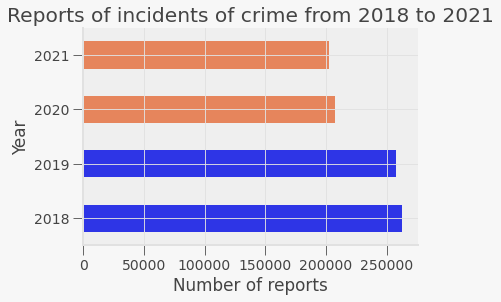

In [54]:
fig, ax = plt.subplots()

colors = [mplc.hsv_to_rgb((0.66, 0.8, 0.9))]*2
colors += [mplc.hsv_to_rgb((0.05, 0.6, 0.9))]*2

Y.plot(kind="barh", ax=ax, color=colors)
ax.set_xlabel('Number of reports')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Reports of incidents of crime from 2018 to 2021")

The bar plot above shows the number of arrests in a given year. We can see a sharp fall in reports from 2019 to 2020. 

Text(0.5, 1.0, 'Reports of incidents of crime from 2018 to 2021 (Q-o-Q)')

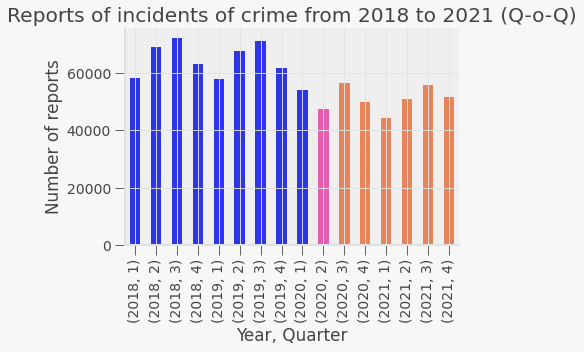

In [55]:
fig, ax = plt.subplots()

colors = [mplc.hsv_to_rgb((0.66, 0.8, 0.9))]*9
colors += [mplc.hsv_to_rgb((0.9, 0.6, 0.9))]
colors += [mplc.hsv_to_rgb((0.05, 0.6, 0.9))]*6

X2_a['Arrest'].plot(kind="bar", ax=ax, color=colors)
ax.set_ylabel('Number of reports')
ax.set_xlabel('Year, Quarter')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Reports of incidents of crime from 2018 to 2021 (Q-o-Q)")

The graph above shows the trend is number of incidents reoprted. The blue bars are reports pre-covid, the pink bar shows the number of reports when the pandemic hit and lastly, orange bars depict reports post covid. 

Text(0.5, 0, 'Time (Months)')

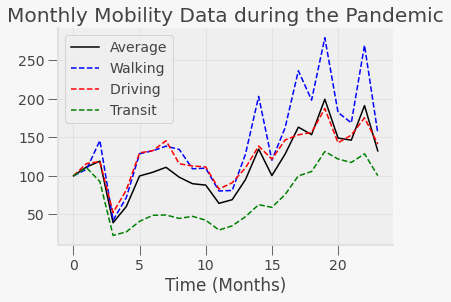

In [56]:
fig, ax = plt.subplots()

mob_m["Average"].plot(ax=ax, legend=False, color='black', linestyle='solid')
mob_m["Walking"].plot(ax=ax, legend=False, color='blue', linestyle='dashed')
mob_m["Driving "].plot(ax=ax, legend=False, color='red', linestyle='dashed')
mob_m["Transit"].plot(ax=ax, legend=False, color='green', linestyle='dashed')


ax.legend()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title("Monthly Mobility Data during the Pandemic")
ax.set_xlabel("Time (Months)")

The Trend of the different mobility indices over time

Text(0.5, 1.0, 'Reports during different times of the day from 2018 to 2021')

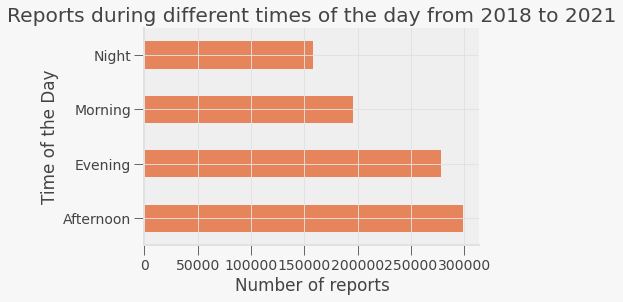

In [57]:
fig, ax = plt.subplots()

colors = [mplc.hsv_to_rgb((0.05, 0.6, 0.9))]*4

X1.plot(kind="barh", ax=ax, color=colors)
ax.set_xlabel('Number of reports')
ax.set_ylabel('Time of the Day')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Reports during different times of the day from 2018 to 2021")

We can see that most number of arrests take place in the Afternoon - Evening period (12PM - 12AM). The Night time (12AM - 6AM) has a lower number of reports. Night has least amount of reports.

Text(0.5, 1.0, 'Reports during different quarters of the year from 2018 to 2021')

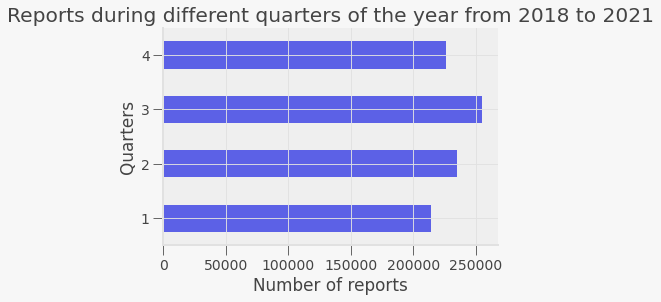

In [58]:
grX2_b = crime_df.groupby("Quarter")
X2_b = grX2_b["Arrest"].count()
fig, ax = plt.subplots()

colors = [mplc.hsv_to_rgb((0.66, 0.6, 0.9))]*4

X2_b.plot(kind="barh", ax=ax, color=colors)
ax.set_xlabel('Number of reports')
ax.set_ylabel('Quarters')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Reports during different quarters of the year from 2018 to 2021")

We do see an upward trend in the number of reports as the year goes by, but sees a fall as we approach the last quarter, which is also the festive period.

Text(0.5, 1.0, 'Reports in different location types from 2018 to 2021')

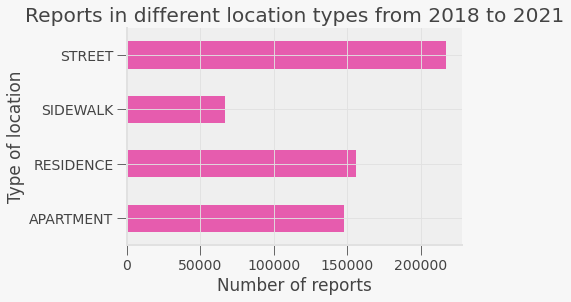

In [59]:
grX4_a = df1.groupby("Location Description")
X4_a = grX4_a["Arrest"].count()
fig, ax = plt.subplots()

colors = [mplc.hsv_to_rgb((0.9, 0.6, 0.9))]*4

X4_a.plot(kind="barh", ax=ax, color=colors)
ax.set_xlabel('Number of reports')
ax.set_ylabel('Type of location')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Reports in different location types from 2018 to 2021")

The ouput shows the distribution of the numbers of incidents of crime reported at the 4 most common location types. 

Text(0.5, 1.0, 'Reports of different crime types from 2018 to 2021')

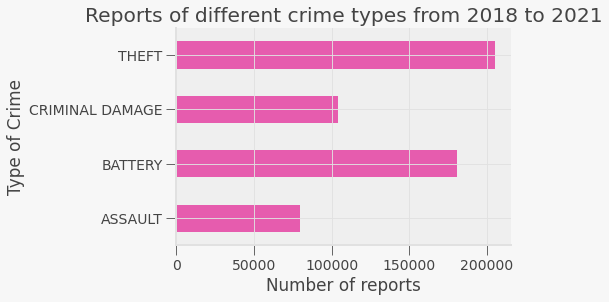

In [60]:
grX5_a = df.groupby("Primary Type")
X5_a = grX5_a["Arrest"].count()
fig, ax = plt.subplots()

colors = [mplc.hsv_to_rgb((0.9, 0.6, 0.9))]*4

X5_a.plot(kind="barh", ax=ax, color=colors)
ax.set_xlabel('Number of reports')
ax.set_ylabel('Type of Crime')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Reports of different crime types from 2018 to 2021")

Theft and Battery are the highest reprted crimes.

## Project 2

### The Message 

In this project, we aim to understand the impact of the pandemic on crime. The pandemic shifted the world into a new way of living. Hence, ee will first look at the relation between mobility and change in number of reports during 2020-21. This will give a direct insight to whether we see a change in number of reports with increase or decrease in mobility. Subsequently, we will use the time of the day and type of location to understand that whether the restrictions imposed on movement and contact due to the pandemic changed these variables, and hence can be related to a drop in reports of crime during the pandemic. Additionally, we will use quarters of the year to understand where the number of reports had a relation with the opening and closing of the city (in terms of restricitions). We will use these variables to understand the changes they went through over time and whether the restrictions imposed explain in large part the change crime went through.

Text(0.5, 1.0, 'Relation between Change in Arrests and Mobility')

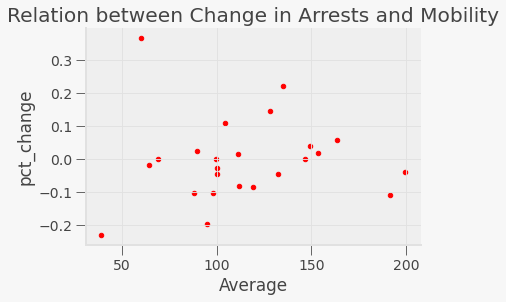

In [64]:
fig, ax = plt.subplots()

crime_m.plot(kind='scatter', x='Average', y='pct_change', ax=ax, color='red')

ax.set_title('Relation between Change in Arrests and Mobility')

We see a positive relationship among the two variables implying that as mobility decreases month-on-month, we expect to see a drop in reports.

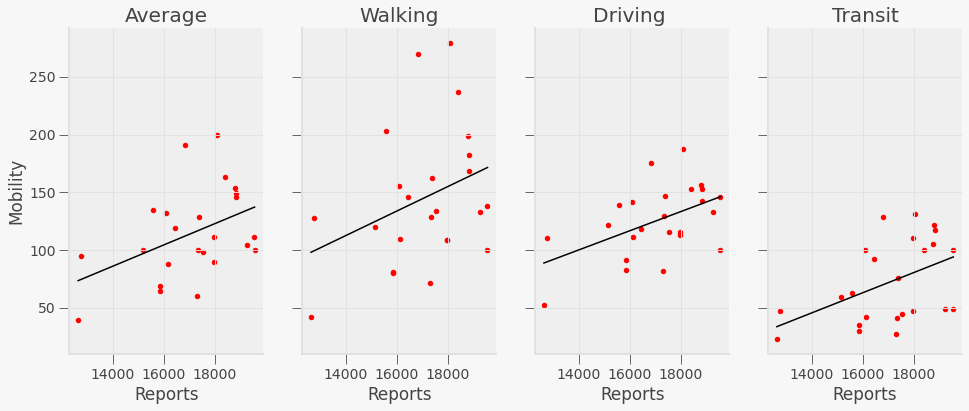

In [65]:
def single_scatter_plot(y, ax):
    """
    This function creates a plot for the relation between mobility and number of reports
    """
    # Filter data to keep only the data of interest
    crime_m.plot(kind="scatter", x="Arrest", y=y, ax=ax, color='red')
    ax.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)), color='black')

    return ax

# Create initial plot
fig, ax = plt.subplots(1, 4, figsize=(16, 6), sharey=True)

mobil = ['Average', 'Walking', 'Driving ', 'Transit']

for (i, y) in enumerate(mobil):
    X = crime_m["Arrest"]
    Y = crime_m[y]
    single_scatter_plot(y, ax[i])
    ax[i].set_title(y)
    ax[i].set_xlabel("Reports")
    ax[i].set_ylabel("Mobility")


We see a posiitve relationship in all indicies.

In [66]:
X1_a.reset_index(inplace=True)
X1_a = X1_a.pivot(index='Year', columns='Time_of_Day', values='Arrest')

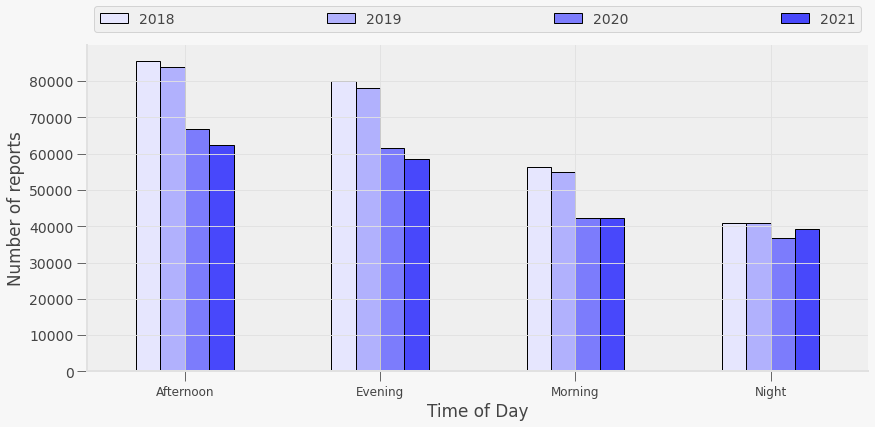

In [67]:
def create_barplot(df, colors):

    fig, ax = plt.subplots(figsize=(14, 6))

    df.T.plot(kind="bar", color=colors, ax=ax, edgecolor="k", rot=0)
    ax.legend(bbox_to_anchor=(0, 1.02, 1.0, 1.02), loc=3, mode="expand", ncol=5)
    ax.set_xticklabels(df.columns, fontsize=12)
    ax.set_ylabel('Number of reports')
    ax.set_xlabel(x_label)

    return fig

colors = [(0.902, 0.902, 0.997), (0.695, 0.695, 0.993), (0.488, 0.488, 0.989),
          (0.282, 0.282, 0.985)]

x_label = 'Time of Day'

create_barplot(X1_a, colors);

We see a similar trend during all time periods of the day, which saw declines in 2020, except for the Night time, which saw a slight fall and a the only time period to see an increase in the number of reports during the pandemic. The share of reports during the night time is the least of all time periods. The Afternoon and Evening period have seen a major decline, which can be one of the resons why the number of reports have fallen. 

In [68]:
X2_a.reset_index(inplace=True)
X2_a = X2_a.pivot(index='Year', columns='Quarter', values='Arrest')

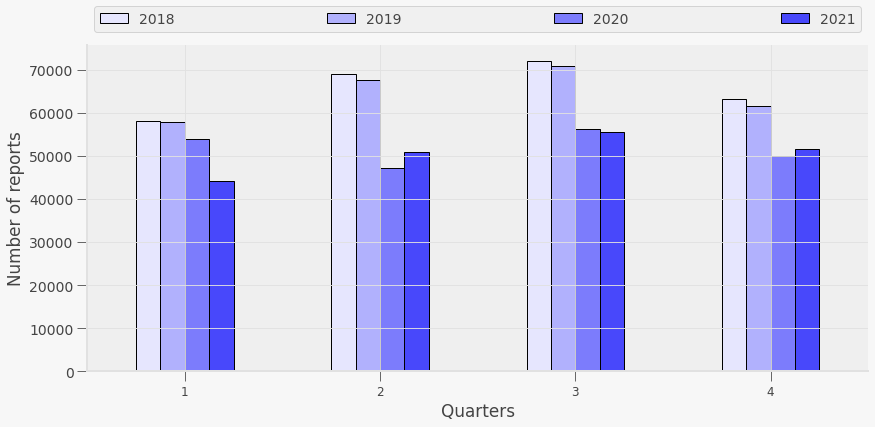

In [69]:
x_label = 'Quarters'
create_barplot(X2_a, colors);


The output above shows that the number of cases per quarter flucated in some part due to the timing of the restrictions imposed by the government on the city of Chicago.

In [70]:
X4a.reset_index(inplace=True)
X4a = X4a.pivot(index='Year', columns='Location Description', values='Arrest')

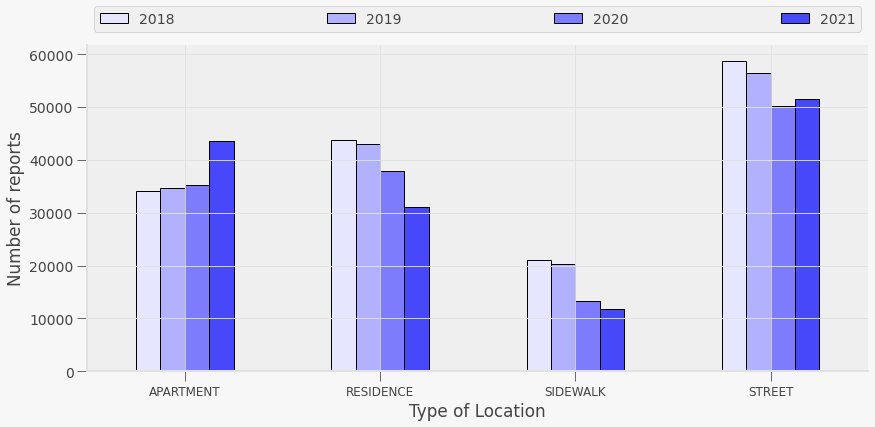

In [71]:
x_label = 'Type of Location'
create_barplot(X4a, colors);

From the output, we can see that the number of reports from the street, sidewalk and residences reduced as the pandemic hit, however, the number of reports from apartments increased. This can be due to the fact that the oppurutunity to commit a crime in public was reduced due to the increase in restrictions and policing in the city. 

In [72]:
X5a = X5a.reset_index()
X5a = X5a.pivot(index='Year', columns='Primary Type', values='Arrest')

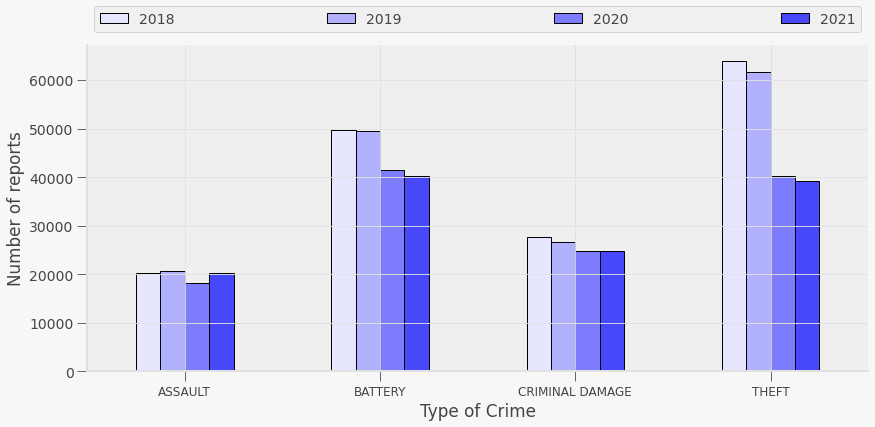

In [73]:
x_label = 'Type of Crime'
create_barplot(X5a, colors);

We can see that reports for thefts and Battery fall drastically as the pandemic hit.

### Mapping

In [74]:
state_df = gpd.read_file("Boundaries - Community Areas (current).zip")

**MAP 1**

In [75]:
crime_df["Community Area"] = crime_df["Community Area"].astype(int)
state_df["Community Area"] = state_df["area_num_1"].astype(int)

In [76]:
X7 = crime_df.groupby("Community Area")
X7a = X7["Arrest"].count()
X7a = pd.DataFrame(X7a)
X7a.reset_index(inplace=True)
com_arrest = pd.merge(state_df, X7a, on='Community Area')

In [77]:
X7a.describe()

,Community Area,Arrest
count,77.000000,77.000000
mean,39.000000,12089.012987
std,22.371857,10301.622015
min,1.000000,989.000000
25%,20.000000,4595.000000
50%,39.000000,8304.000000
75%,58.000000,15961.000000
max,77.000000,53610.000000


Summary Stats for Community Area codes

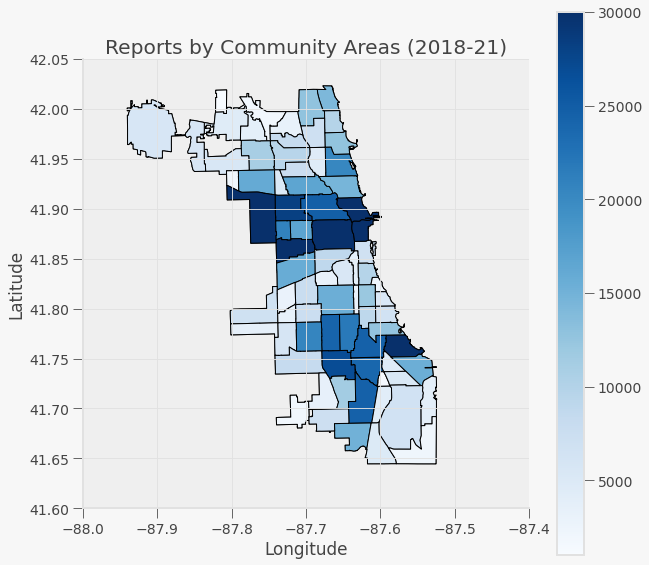

In [78]:
fig, gax = plt.subplots(figsize=(10, 10))

state_df.plot(ax=gax, edgecolor="black", color="white")
com_arrest.plot(ax=gax, edgecolor='black', column='Arrest', legend=True, cmap='Blues', vmin=1000, vmax=30000)
gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_xlim((-88, -87.4))
gax.set_ylim((41.6, 42.05))
gax.set_title("Reports by Community Areas (2018-21)")
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

The Map above shows the number of reports of crime for each Community Area in Chicago from 2018-21.

In [79]:
X8 = crime_df.groupby(["Community Area", "Year"])
X8a = X8["Arrest"].count()
X8a = pd.DataFrame(X8a)
g = X8a.pct_change()
g = pd.DataFrame(g)
g = g.reset_index()
X8a = X8a.reset_index()
X8a["pct_change"] = g["Arrest"]
X8a = X8a.set_index("Year")
X8a = X8a.drop([2018, 2019, 2021])
X8a.reset_index(inplace=True)
X8a = X8a.drop(["Arrest", "Year"], axis=1)

com_pct = pd.merge(state_df, X8a, on='Community Area')

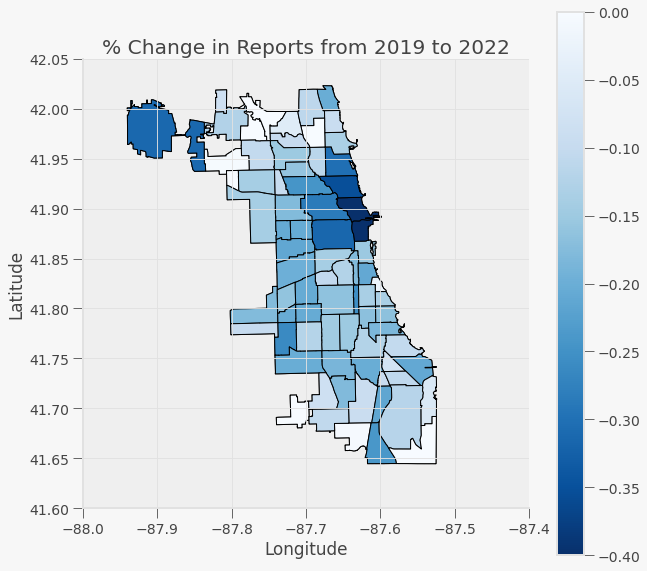

In [80]:
fig, gax = plt.subplots(figsize=(10, 10))

state_df.plot(ax=gax, edgecolor="black", color="white")
com_pct.plot(ax=gax, edgecolor='black', column='pct_change', legend=True, cmap='Blues_r', vmin=-0.4, vmax=0)
gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_xlim((-88, -87.4))
gax.set_ylim((41.6, 42.05))
gax.set_title("% Change in Reports from 2019 to 2022")
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

The map above shows the percent change in number of reports from 2019 to 2020. We can see that number of reprts fell in all community areas. We see huge falls in some community areas (close to 30%).

## Conclusion

After analyzing the chicago police data on the reports of incidents of crime from 2016 to 2021, we have found that there indeed was a change in crime as the pandemic stuck. We see a drastic drop in areports post the pandamic, with reports still well below the pre-covid levels. We have seen that historically most crimes take place during the classified Afternoon and Evening period, which saw huge drops in reports during the pandemic. Along with this, the time with the least reports saw a rise post the pandemic. This could be due to the lack oppurtunity to commit a crime in the day. Moving on, the trend of number of reports over the different quarters of the year followed the easing and tightening of restrictions. We see a fall in reports histprically during the last quarter of the year. We also saw a fall in public, i.e. street and sidewalk reports which is consistent with the belief that the restrictions imposed due to pandemic reduced the oppurtunity to commit a crime. At the same time, there wouldbe less witnesses as well t report these crimes. Apartment reports saw an increase, consistent with our hypothesis. Lastly, the 11th district, with a few outlier districts. In conclusion, as understood by our variables, we can say that the restrictions imposed on movement and contact due to the pandemic did have an effect on crime and reduced the oppurtunity to commit one. As a result, we have seen a drop in number of reports of incidents of crime.

## Project 3

In this project, we aim to further analyze by taking a deeper dive into the 'months' by adding data on temperature, and number of hot and freezing days in a month. This will help us understand and explore our previous finding that the number of reports were relatively higher in the middle quarters. 

The paper tried to add data on household income by community areas to understand the economic impact of covid and the relation between income and crime. This however was not possible as the way the HTML was coded does not allow us to extract information from the site. Also, other sites that were found showed incomplete data. 

**Extracting The Data**

We will use weather data from https://www.currentresults.com/Weather/Illinois/Places/chicago-temperatures-by-month-average.php

In [81]:
# importing the required libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup

web_url1 = 'https://www.currentresults.com/Weather/Illinois/Places/chicago-temperatures-by-month-average.php'
response = requests.get(web_url1)

print('Status code\n', response.status_code)

Status code
 200


A request is sent to the server to access the URL. As we can see that the STATUS CODE of our request is 200, which means that our request has been successful. 

**Parssing the Data**

In [82]:
soup_object = BeautifulSoup(response.content)

**Creating Data Frames**

We will now create data frames for the data that is required from the URL. 

In [83]:
data_table = soup_object.find_all('table', 'articletable tablecol-3-left revcolr')[0]
data_table1 = soup_object.find_all('table', 'articletable tablecol-1-left')[0]
data_table2 = soup_object.find_all('table', 'articletable tablecol-1-left')[1]

Now, all the observations are stored between 'tr' tages. Therefore, we store all the values that in those tr tags.

In [84]:
all_values = data_table.find_all('tr')
all_values1 = data_table1.find_all('tr')
all_values2 = data_table2.find_all('tr')

We now create the data frame. We follow th following steps:

1. Create an empty Data Frame
2. Initialize our index to 0
3. Start a for loop with considers all the values in the tr strings
4. Extract row headings in a similar manner inside the loop using the td strings
5. We populate the dataframe as the loop goes on

In [85]:
temp_data = pd.DataFrame(columns = ['Month', 'High', 'Low'])
# Create an empty dataframe
ix = 0 # Initialise index to zero

for row in all_values[1:]:
    values = row.find_all('td') # Extract all elements with tag <td>
    # Pick only the text part from the <td> tag
    month = values[2].text
    high = values[3].text
    low = values[4].text
    
    temp_data.loc[ix] = [month, high, low] 
    # Store it in the dataframe as a row
    ix += 1

In [86]:
temp_data.reset_index(inplace=True)
temp_data['Month_v'] = temp_data['index'].astype(int) + 1

In [87]:
temp_data['High'] = temp_data['High'].astype(int)
temp_data['Low'] = temp_data['Low'].astype(int)
temp_data['Avg'] = (temp_data['High'] + temp_data['Low'])/2
temp_data.drop('index', axis=1, inplace=True)
temp_data.head()

,Month,High,Low,Month_v,Avg
0,January,-1,-9,1,-5.0
1,February,1,-7,2,-3.0
2,March,8,-1,3,3.5
3,April,15,4,4,9.5
4,May,22,10,5,16.0


In [88]:
hot_temp_data = pd.DataFrame(columns = ['Month', '21', '27', '32'])
# Create an empty dataframe
ix = 0 # Initialise index to zero

for row in all_values1[1:]:
    values = row.find_all('td') # Extract all elements with tag <td>
    # Pick only the text part from the <td> tag
    month = values[0].text
    cel_21 = values[1].text
    cel_27 = values[2].text
    cel_32 = values[3].text
    
    hot_temp_data.loc[ix] = [month, cel_21, cel_27, cel_32] 
    # Store it in the dataframe as a row
    ix += 1

In [89]:
cold_temp_data = pd.DataFrame(columns = ['Month', '0', '-8', '-12'])
# Create an empty dataframe
ix = 0 # Initialise index to zero

for row in all_values2[1:]:
    values = row.find_all('td') # Extract all elements with tag <td>
    # Pick only the text part from the <td> tag
    month = values[0].text
    cel_0 = values[1].text
    cel_8 = values[2].text
    cel_12 = values[3].text
    
    cold_temp_data.loc[ix] = [month, cel_0, cel_8, cel_12] 
    # Store it in the dataframe as a row
    ix += 1

In [90]:
hot_temp_data["avgh"] = (hot_temp_data["21"].astype(int) + hot_temp_data["27"].astype(int) + hot_temp_data["32"].astype(int))//3
hot_temp_data.head()

,Month,21,27,32,avgh
0,January,0,0,0,0
1,February,0,0,0,0
2,March,2,0,0,0
3,April,6,2,0,2
4,May,17,8,1,8


In [91]:
cold_temp_data["avgc"] = (cold_temp_data["0"].astype(int) + cold_temp_data["-8"].astype(int) + cold_temp_data["-12"].astype(int))//3
cold_temp_data.head()

,Month,0,-8,-12,avgc
0,January,7,16,27,16
1,February,4,11,23,12
2,March,1,4,18,7
3,April,0,0,4,1
4,May,0,0,0,0


In [92]:
temp_data = temp_data.drop(['High', 'Low'], axis=1)

In [93]:
hot_temp_data = hot_temp_data.drop(['Month', '21', '27', '32'], axis=1)

In [94]:
cold_temp_data = cold_temp_data.drop(['Month', '0', '-8', '-12'], axis=1)

**Merging the Data**

We are not merging the data with our original dataset. This is because we simply want to understand the ipact of weather on number of incidents reported. Therefore, we will create a data frame which will have the number of reports grouped by Month, and showing its 10-average temperate, number of hot days (when temperature is above 21 degress celcius) and number of cold days ( when temperature is below 0).

In [95]:
month_group = crime_df.groupby('Month')
mg = month_group['Arrest'].count()
mg = pd.DataFrame(mg)
mg.reset_index(inplace=True)

In [96]:
mg = pd.concat([mg, temp_data], axis=1)
mg = pd.concat([mg, hot_temp_data], axis=1)
mg = pd.concat([mg, cold_temp_data], axis=1)
mg = mg.dropna()

In [97]:
mg 

,Month,Arrest,Month,Month_v,Avg,avgh,avgc
0,1.0,75017.0,January,1,-5.0,0,16
1,2.0,66037.0,February,2,-3.0,0,12
2,3.0,73232.0,March,3,3.5,0,7
3,4.0,69493.0,April,4,9.5,2,1
4,5.0,82539.0,May,5,16.0,8,0
5,6.0,82963.0,June,6,21.5,16,0
6,7.0,87419.0,July,7,24.0,21,0
7,8.0,86661.0,August,8,23.0,19,0
8,9.0,81024.0,September,9,19.0,12,0
9,10.0,80488.0,October,10,12.0,3,0


In [98]:
mg.describe()

,Month,Arrest,Month_v,Avg,avgh,avgc
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,77571.166667,6.500000,10.375000,6.750000,4.333333
std,3.605551,6873.238668,3.605551,10.416606,8.158933,5.913518
min,1.000000,66037.000000,1.000000,-5.000000,0.000000,0.000000
25%,3.750000,73081.750000,3.750000,2.500000,0.000000,0.000000
50%,6.500000,77752.500000,6.500000,10.750000,2.500000,0.500000
75%,9.250000,82645.000000,9.250000,19.625000,13.000000,8.250000
max,12.000000,87419.000000,12.000000,24.000000,21.000000,16.000000


The first output is the dataset that we have created through data extracted by HTML web scrapping and then merging with some of our original data. The summary statistics of the dataset tells us that the Average temperature in Chicago is 10 degress celcius, with going as low as -5 on average and as high as 24 degrees celcius on average.  

Text(0.5, 1.0, 'Relation between number of incidents reported and 10 year avg temperature in the same Month')

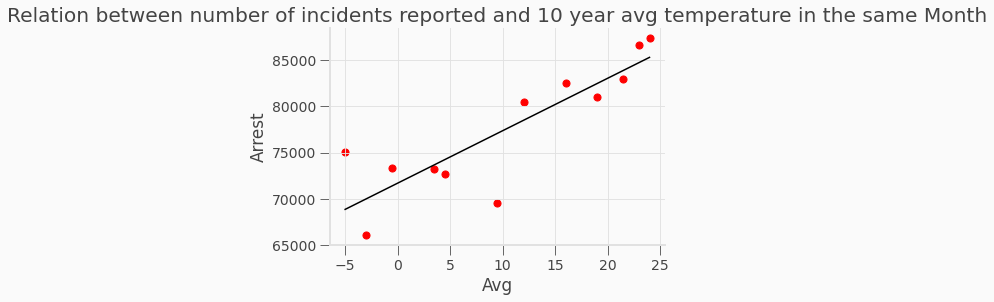

In [99]:
fig, ax = plt.subplots()

mg.plot(kind="scatter", x="Avg", y="Arrest", ax=ax, s=50, color="red")
X = mg["Avg"]
Y = mg["Arrest"]
ax.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)), color='black')
bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
ax.set_facecolor(bgcolor)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Relation between number of incidents reported and 10 year avg temperature in the same Month")

Write about it

Text(0.5, 1.0, 'Relation between number of incidents reported, and average hot and cold days in the same Month')

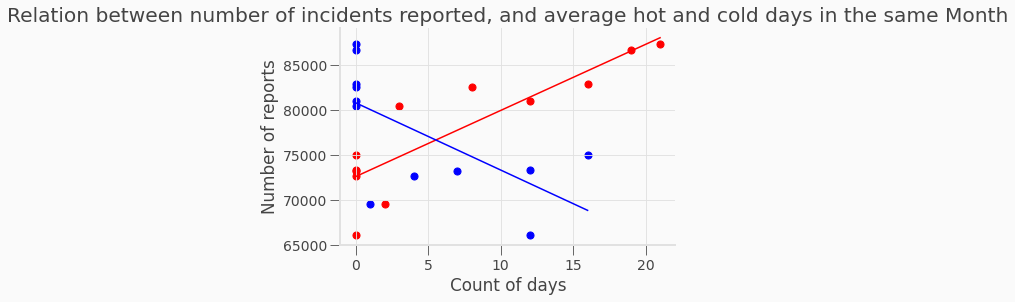

In [100]:
fig, ax = plt.subplots()

mg.plot(kind="scatter", x="avgh", y="Arrest", ax=ax, s=50, color = 'red')
mg.plot(kind="scatter", x="avgc", y="Arrest", ax=ax, s=50, color = 'blue')
X1 = mg["avgh"]
X2 = mg["avgc"]
Y = mg["Arrest"]
ax.plot(np.unique(X1), np.poly1d(np.polyfit(X1, Y, 1))(np.unique(X1)), color='red')
ax.plot(np.unique(X2), np.poly1d(np.polyfit(X2, Y, 1))(np.unique(X2)), color='blue')

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
ax.set_facecolor(bgcolor)
ax.set_ylabel('Number of reports')
ax.set_xlabel('Count of days')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Relation between number of incidents reported, and average hot and cold days in the same Month")

In this graph, we do see an overall positive relation among the number of hot days and the number of incidents reported. We see the opposite relation between the number of cold days and number of reports. We see that in general, we have more reports when the temperature in above 20 degress celcius on average than when it is below 0 degress celcius. We can also see from the dots at 0 count of days, We see clearly that when there are no cold days, number of reports are lower than months which have cold weather.

## Conclusion

The first project involved extracting our data set, cleaning it according to our requirements, choosing ur variables of study and understanding their distribution. We saw that the number of reports fell as covid hit and hasn't recovered since. We then looked at variables like Time of the day, quarters of te year and the type of location to understand the impact of covid-19 induced restrictions on number of reports. 

The second project helped us deliver our message that covid-19 induced restricitions had an impact on the number of incidents of crime reported. We saw drastic falls in all time periods of the day expect the Night, which was in line wiht our belief that due to increased policing, and restricitions duing the day time, the oppurtunity to commit a crime is reduced in the day. Similarly, we saw drops in all location types except apartments as people were forced to stay at home. Lastly, we saw that the number of reports were lower in the first and last quarter than the middle two quarters. 

The third project helped us get insight into the 'months' of the year but analyzing the relationship between the nuber of incidents reported, and average temperature in the month, average number of hot and cold days. On analyzing their relationship, we found a positive association between the number of incidents reported and the average temperature in the month. This inisght was further helped when we saw that when a particula month has no cold days, it has relatively higher reports against months that have no hot days. Overall, as the number of hot days incresed, reports followed. We see that as the number of cold days become more than 0, we see a considerable drop. However, after that there is not much change. Through this, we can understand the quarter variable better and why the first and last quarters have considerably less reports. Through the help of web-scrapping we have found considerable evidence that a weather affects the number of incidents reported.


## Final Project

### OLS Regressions

In [101]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS

In [102]:
day = crime_df.groupby(["Year", "Month", "Day"])
dayx = day["Arrest"].count()
dayx = pd.DataFrame(dayx)
dayx.reset_index(inplace=True)
dayx = dayx.set_index("Year")
dayx = dayx.drop([2018, 2019])
dayx.reset_index(inplace=True)
for i in range(0, 12):
    dayx = dayx.drop(i)

In [122]:
mob_df[["Day", "Year", "Month"]] = mob_df[["Day", "Year", "Month"]].astype(int)

In [123]:
mob_day = pd.merge(mob_df, dayx, on=["Day", "Year", "Month"])

In [124]:
for i in range(0, len(mob_day["Arrest"])):
    if mob_day["Arrest"][i] > 800:
        mob_day.set_index("Arrest")
        mob_day = mob_day.drop(i)
        mob_day.reset_index()
    else:
        i=i+1

In [125]:
mob_day["Log(Average)"] = np.log(mob_day["Average"])
mob_day["Log(Walking)"] = np.log(mob_day["Walking"])
mob_day["Log(Driving)"] = np.log(mob_day["Driving "])
mob_day["Log(Transit)"] = np.log(mob_day["Transit"])
crime_m["Log(Average)"] = np.log(crime_m["Average"])
crime_m["Log(Walking)"] = np.log(crime_m["Walking"])
crime_m["Log(Driving)"] = np.log(crime_m["Driving "])
crime_m["Log(Transit)"] = np.log(crime_m["Transit"])

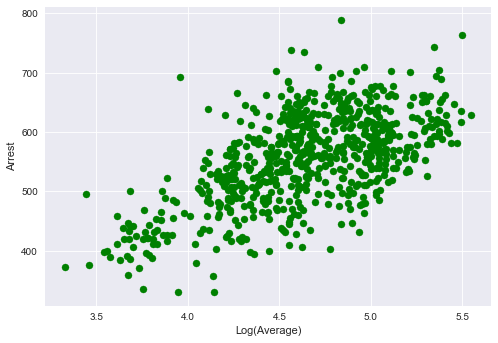

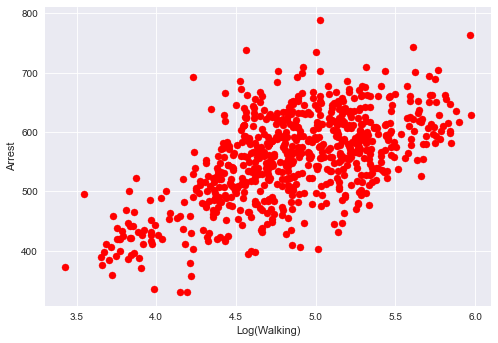

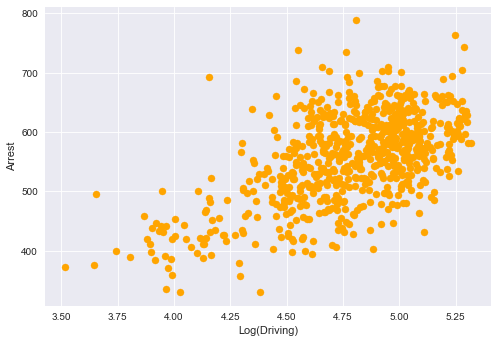

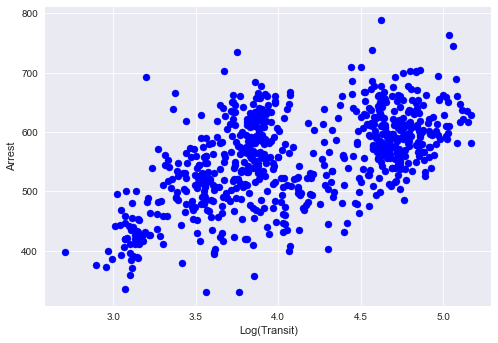

In [126]:
plt.style.use('seaborn')

mob_day.plot(x='Log(Average)', y='Arrest', kind='scatter', s=50, color='green')
mob_day.plot(x='Log(Walking)', y='Arrest', kind='scatter', s=50, color='red')
mob_day.plot(x='Log(Driving)', y='Arrest', kind='scatter', s=50, color='orange')
mob_day.plot(x='Log(Transit)', y='Arrest', kind='scatter', s=50, color='blue')

plt.show()

This paper aims to asses the relationship between mobility and reports. From the scatterplots above, we can see a positive linear realtionship for all indices except Transit. This makes sense, as for a crime to be committied, an interaction between the criminal and victim is required. As mobility reduces, the opprtunity of this interaction reduces as well. This is explained by the fact that we see higher reports in Afternoon than at Night. Moreover, as the number of cold days in a month increase, we see a drop in reports which is consitent with the belief discussed.

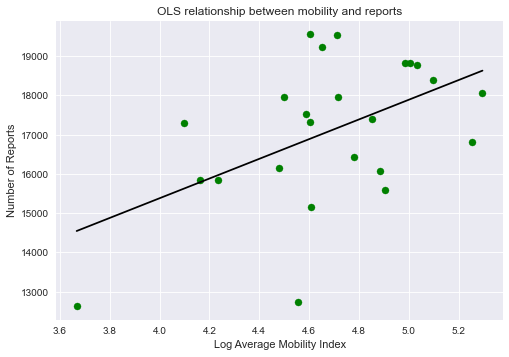

In [127]:
# Use only 'Average' and Monthly data as subset for plotting purposes

X = crime_m['Log(Average)']
y = crime_m['Arrest']

fig, ax = plt.subplots()
crime_m.plot(x='Log(Average)', y='Arrest', kind='scatter', ax=ax, s=50, color='green')
ax.plot(np.unique(X), np.poly1d(np.polyfit(X, y, 1))(np.unique(X)), color='black')

ax.set_xlabel('Log Average Mobility Index')
ax.set_ylabel('Number of Reports')
ax.set_title('OLS relationship between mobility and reports')
plt.show()

In [128]:
crime_m['const'] = 1
reg1 = sm.OLS(endog=crime_m['Arrest'], exog=crime_m[['const', 'Log(Average)']], missing='drop')
results = reg1.fit()

In [129]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Arrest   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     7.589
Date:                Sat, 16 Apr 2022   Prob (F-statistic):             0.0116
Time:                        23:13:20   Log-Likelihood:                -210.79
No. Observations:                  24   AIC:                             425.6
Df Residuals:                      22   BIC:                             427.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5360.3919   4267.131      1.256   

In [208]:
mean_expr = np.mean(crime_m['Log(Average)'])
results.predict(exog=[1, mean_expr])

array([17078.83333333])

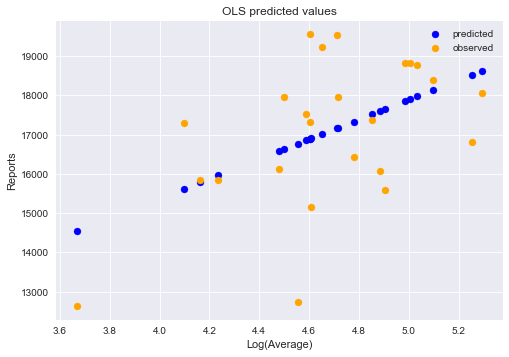

In [213]:
# Predicted values

fix, ax = plt.subplots()
ax.scatter(crime_m['Log(Average)'], results.predict(), color='blue', label='predicted')

# Observed values

ax.scatter(crime_m['Log(Average)'], crime_m['Arrest'], color='orange', label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('Log(Average)')
ax.set_ylabel('Reports')
plt.show()

**Bivariate Regressions**

In [217]:
crime_m['const'] = 1

X1 = ['const', 'Log(Walking)']
X2 = ['const', 'Log(Driving)']
X3 = ['const', 'Log(Transit)']

reg2 = sm.OLS(crime_m['Arrest'], crime_m[X1], missing='drop').fit()
reg3 = sm.OLS(crime_m['Arrest'], crime_m[X2], missing='drop').fit()
reg4 = sm.OLS(crime_m['Arrest'], crime_m[X3], missing='drop').fit()

In [218]:
from statsmodels.iolib.summary2 import summary_col
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}", 
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

In [219]:
results_table = summary_col(results=[reg2,reg3,reg4],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 2',
                                         'Model 3',
                                         'Model 4'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'Log(Walking)',
                                             'Log(Driving)',
                                             'Log(Transit)'])

results_table.add_title('OLS Regressions 2 - 4')

print(results_table)

              OLS Regressions 2 - 4
                  Model 2   Model 3     Model 4  
-------------------------------------------------
const            8163.62*  -238.38    10031.17***
                 (4076.94) (5764.50)  (2695.47)  
Log(Walking)     1821.56**                       
                 (829.87)                        
Log(Driving)               3607.50***            
                           (1198.90)             
Log(Transit)                          1696.83**  
                                      (643.78)   
R-squared        0.18      0.29       0.24       
R-squared Adj.   0.14      0.26       0.21       
R-squared        0.18      0.29       0.24       
No. observations 24        24         24         
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


**Multivariate Regressions**

In [221]:
X4 = ['const', 'Log(Driving)', 'Log(Transit)']
X5 = ['const', 'Log(Driving)', 'Log(Transit)', 'Log(Walking)']

reg5 = sm.OLS(crime_m['Arrest'], crime_m[X4], missing='drop').fit()
reg6 = sm.OLS(crime_m['Arrest'], crime_m[X5], missing='drop').fit()

In [222]:
from statsmodels.iolib.summary2 import summary_col
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}", 
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

In [223]:
results_table = summary_col(results=[reg5,reg6],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 5',
                                         'Model 6'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'Log(Walking)',
                                             'Log(Driving)',
                                             'Log(Transit)'])

results_table.add_title('OLS Regressions 5 - 6')

print(results_table)

        OLS Regressions 5 - 6
                  Model 5   Model 6  
-------------------------------------
const            1629.33   -9964.81  
                 (6604.32) (7953.10) 
Log(Walking)               -5887.56**
                           (2622.55) 
Log(Driving)     2689.21   10617.80**
                 (1937.57) (3952.39) 
Log(Transit)     611.64    1177.32   
                 (1004.52) (953.81)  
R-squared        0.30      0.44      
R-squared Adj.   0.24      0.36      
R-squared        0.30      0.44      
No. observations 24        24        
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


### Machine Learning

In [130]:
X = crime_m.drop(["Month", "Year", "Date", "Arrest", "const"], axis=1).copy()

In [131]:
y = crime_m['Arrest']

In [132]:
from sklearn import tree
d_tree = tree.DecisionTreeRegressor(max_depth=3).fit(X,y)

In [133]:
y_pred_tree = d_tree.predict(X)

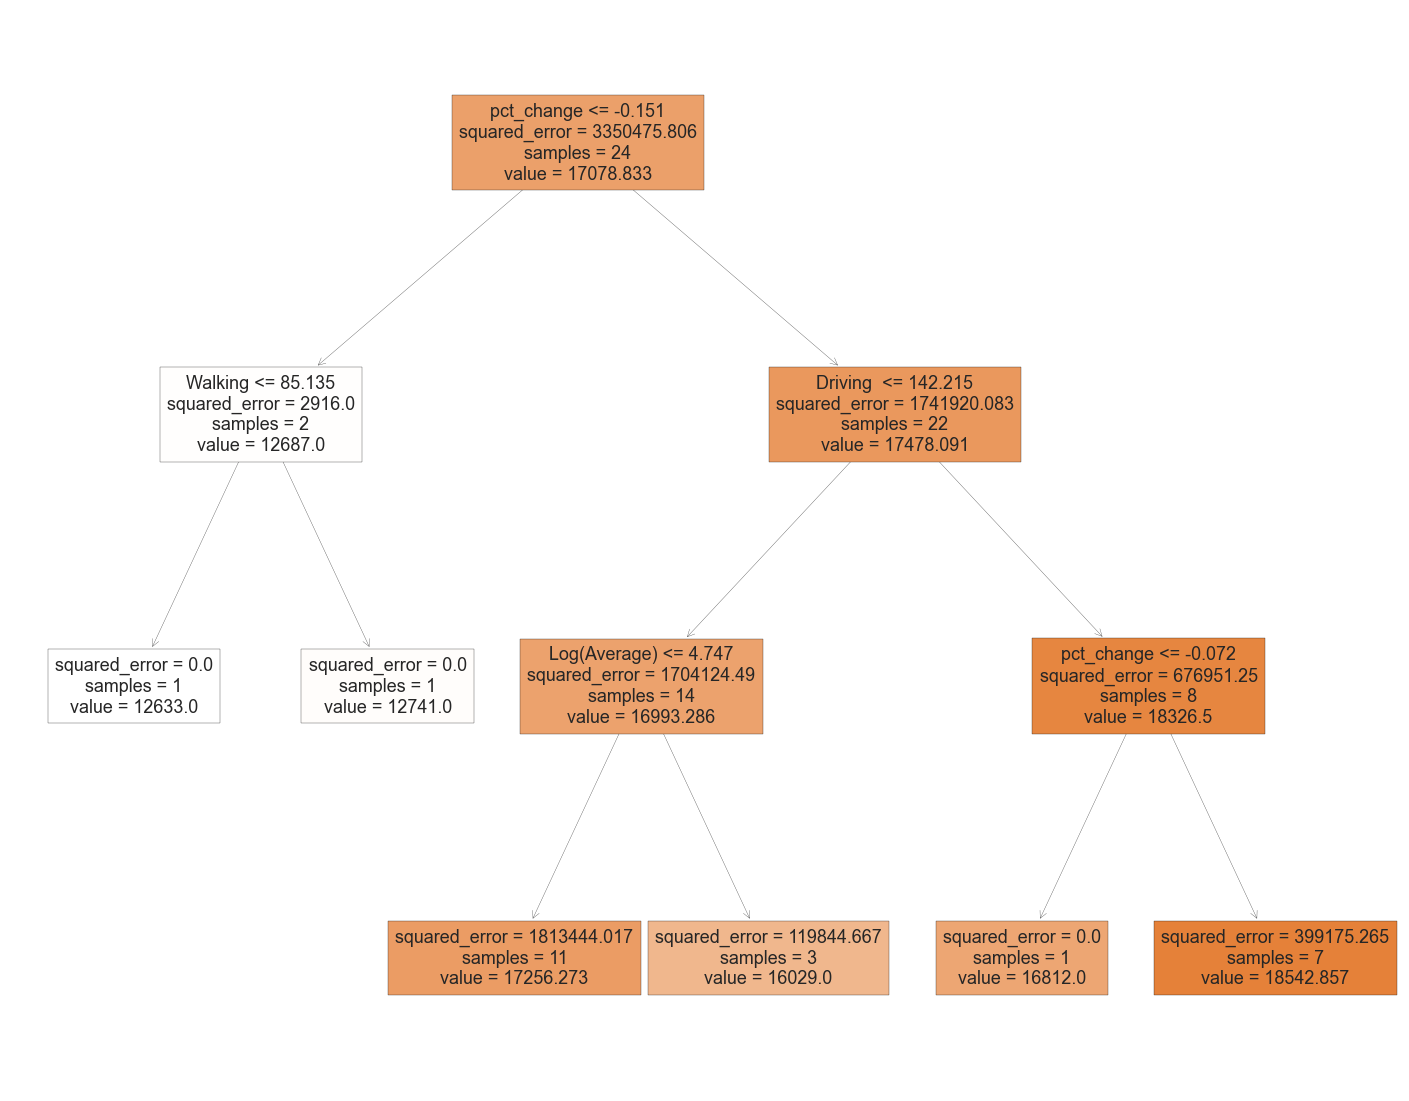

In [134]:
crime_fig = plt.figure(figsize=(25,20))
crime_fig = tree.plot_tree(d_tree, feature_names=X.columns, filled=True)